## Data

- We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

- We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results

- Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
-
Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081-

Summary: The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.c

- Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081
- 
penguins_size.csv: Simplified data from original penguin data sets. Contains variables:- 

species: penguin species (Chinstrap, Adélie, or Gen t    - oo)
culmen_length_mm: culmen length       - (mm)
culmen_depth_mm: culmen depth        -  (mm)
flipper_length_mm: flipper leng
            - h (mm)
body_mass_g: body 
    m- ass (g)
isisland: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex- 

Note: The culmen is "the upper ridge of a bird's beak***"

Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an expe

- 10:16 am 
 am 


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### LOAD DATA

In [3]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
(10/344)*100

2.9069767441860463

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
df=df[df['sex']!='.']

### Visualization

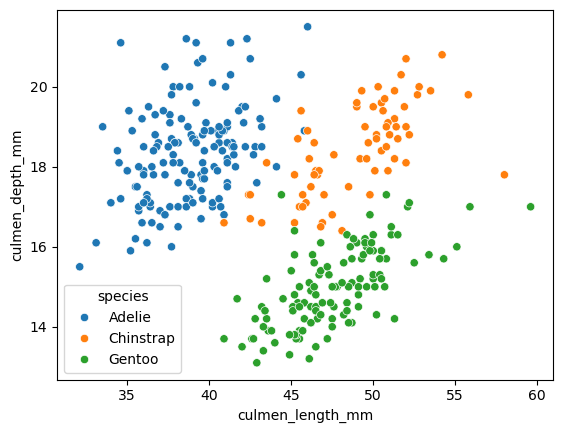

In [13]:
sns.scatterplot(x='culmen_length_mm' ,y='culmen_depth_mm', data=df ,hue='species')
plt.show()

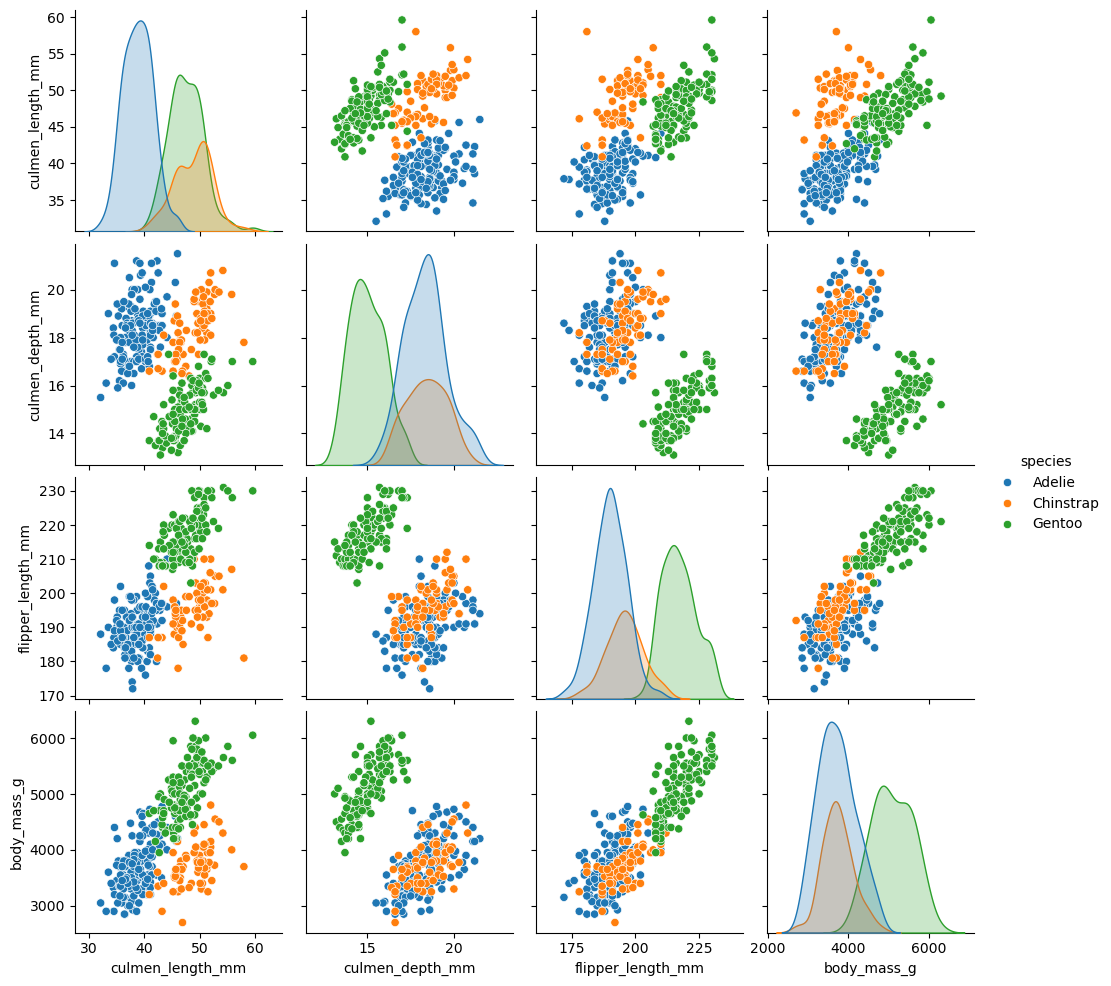

In [14]:
sns.pairplot(df,hue='species')
plt.show()

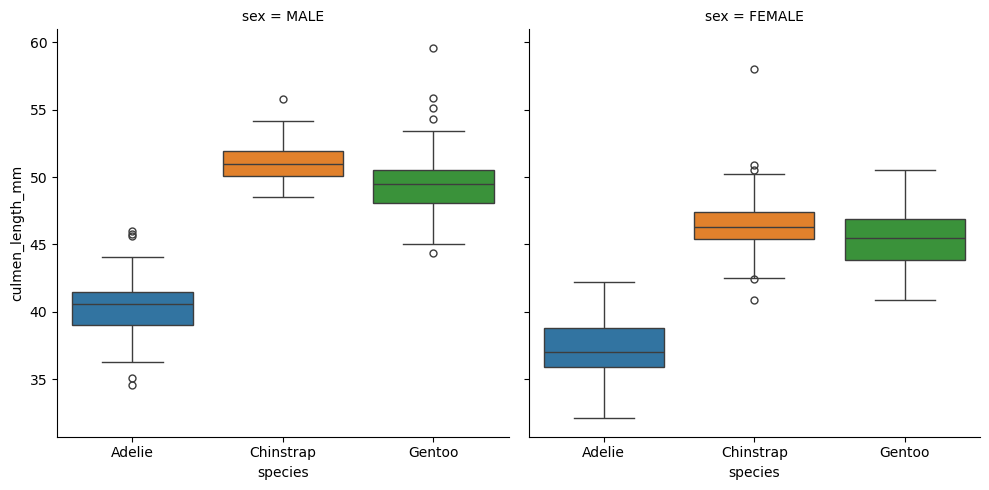

In [51]:
sns.catplot(x='species',y='culmen_length_mm',data=df, kind='box',col='sex',hue='species')
plt.show()

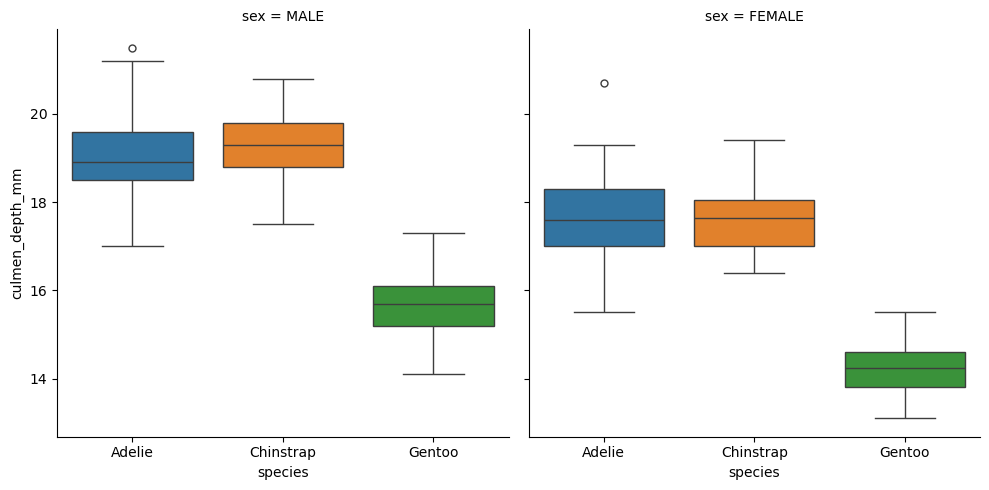

In [17]:
sns.catplot(x='species',y='culmen_depth_mm',data=df, kind='box',col='sex',hue='species')
plt.show()

### Feature Engineering

In [18]:
df1= pd.get_dummies(df).astype(int)
df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39,18,181,3750,1,0,0,0,0,1,0,1
1,39,17,186,3800,1,0,0,0,0,1,1,0
2,40,18,195,3250,1,0,0,0,0,1,1,0
4,36,19,193,3450,1,0,0,0,0,1,1,0
5,39,20,190,3650,1,0,0,0,0,1,0,1


In [22]:
# creating our feature variable(X) and target avaiable(y)
X=pd.get_dummies(df.drop('species',axis=1)).astype(int)
y=df['species']
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39,18,181,3750,0,0,1,0,1
1,39,17,186,3800,0,0,1,1,0
2,40,18,195,3250,0,0,1,1,0
4,36,19,193,3450,0,0,1,1,0
5,39,20,190,3650,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47,13,214,4925,1,0,0,1,0
340,46,14,215,4850,1,0,0,1,0
341,50,15,222,5750,1,0,0,0,1
342,45,14,212,5200,1,0,0,1,0


In [23]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [28]:
len(X_train),len(X_test),len(y_train),len(y_test)

(233, 100, 233, 100)

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [40]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred=model.predict(X_test)

### Model Evaluation

In [35]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [36]:
confusion_matrix(y_test,y_pred)

array([[48,  0,  0],
       [ 1, 17,  0],
       [ 0,  0, 34]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.99

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



In [45]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.348400
culmen_depth_mm,0.017773
flipper_length_mm,0.509967
body_mass_g,0.000000
island_Biscoe,0.058057
island_Dream,0.039554
island_Torgersen,0.000000
sex_FEMALE,0.026249
sex_MALE,0.000000


### Visualizing the Decision tree

In [46]:
from sklearn.tree import plot_tree

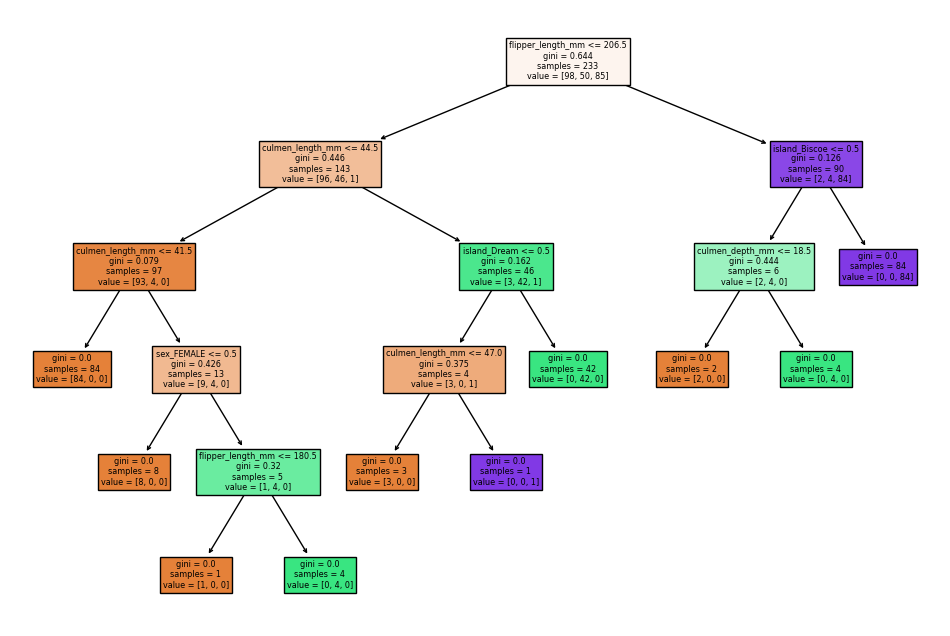

In [52]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

In [49]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [53]:
from sklearn.datasets import load_diabetes

In [ ]:
data = load_diabetes()
X=data.data
y=data.target